In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('ops')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "ops"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : locate a Hopf bifurcation"%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)

print("\n%s : second run : compute a branch of periodic solutions"%pgm)
uzr = {3: [0.92, 0.93]}
r2 = ac.run(r1("HB1"),IPS=2,ICP=[3,11],NMX=150,RL0=0.9,UZR=uzr,UZSTOP={},runner=runner)
ac.save(r1+r2,'0')

print("\n%s : third run : locate a 1-parameter extremum as a bifurcation"%pgm)
icp=[3,11,12,22,-22,-23,-31]
r3 = ac.run(r2("UZ1"),IPS=15,ILP=0,ICP=icp,ISP=2,NMX=25,ITNW=7,DS=-0.05,runner=runner)

print("\n%s : fourth run : switch branches to generate adjoint variables"%pgm)
r4 = ac.run(r3("BP1"),ISW=-1,ISP=0,NMX=5,runner=runner)
ac.save(r3+r4,'1')

print("\n%s : fifth run : a 2-parameter branch of 1-parameter extrema"%pgm)
icp[1:3]=[2,11]
uzr[22]=0.0
r5 = ac.run(r4,ICP=icp,ISW=1,NMX=150,RL0=0.8,RL1=1.9,DS='-',UZR=uzr,runner=runner)
ac.save(r5,'2')

print ("\n%s : sixth run : a 3-parameter branch of 2-parameter extrema"%pgm)
icp[2:4]=[1,11]
r6 = ac.run(r5("UZ4"),IRS=15,ICP=icp,NTST=50,UZR={1:[0.1,0.05,0.01,0.005,0.001]},runner=runner)
ac.save(r6,'3')

Copying demo ops ... done

Demo ops is started

ops : first run : locate a Hopf bifurcation
gfortran -fopenmp -O -c ops.f90 -o ops.o
gfortran -fopenmp -O ops.o -o ops.exe /auto/lib/*.o
Starting ops ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM         U(1)          U(2)          U(3)     
   1     1  EP    1   9.00000E-01   1.82937E+00   9.00000E-01   1.31400E+00   9.00000E-01
   1     7  HB    2   9.37557E-01   1.87497E+00   9.37557E-01   1.32570E+00   9.37557E-01
   1     9  UZ    3   9.49998E-01   1.88936E+00   9.49998E-01   1.32842E+00   9.49998E-01

 Total Time    0.149E-01


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


ops ... done

ops : second run : compute a branch of periodic solutions
Starting ops ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)       PERIOD    
   2    30  UZ    4   9.29999E-01   1.83533E+00   1.20239E+00   1.44359E+00   9.75951E-01   5.01303E+00
   2    52  LP    5   9.21972E-01   1.75279E+00   1.51133E+00   1.47811E+00   1.03204E+00   6.61494E+00
   2    75  LP    6   9.28528E-01   1.97363E+00   2.00512E+00   1.51718E+00   1.20729E+00   1.01841E+01
   2   101  UZ    7   9.20003E-01   2.07774E+00   2.04165E+00   1.52622E+00   1.21404E+00   9.81880E+00
   2   116  EP    8   8.99164E-01   2.09994E+00   2.04162E+00   1.54078E+00   1.19926E+00   9.29532E+00

 Total Time    0.132E+00
ops ... done
Saving to b.0, s.0, and d.0 ... done

ops : third run : locate a 1-parameter extremum as a bifurcation
Starting ops ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)       PERIOD       PAR(12)       PAR(

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)       PERIOD       PAR(12)       PAR(22)    
   3     5  EP   11   9.21972E-01   1.75279E+00   1.51151E+00   1.47775E+00   1.03227E+00   6.61496E+00   8.17565E-02   3.51110E-03

 Total Time    0.272E-01
ops ... done
Saving to b.1, s.1, and d.1 ... done

ops : fifth run : a 2-parameter branch of 1-parameter extrema
Starting ops ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      PAR(2)         PERIOD       PAR(22)    
   3    10  UZ   12   9.30001E-01   1.75194E+00   1.56395E+00   1.47651E+00   1.03332E+00   4.71848E+00   6.86504E+00   2.69161E-03
   3    70  UZ   13   9.30000E-01   1.97335E+00   2.01156E+00   1.51330E+00   1.19810E+00   4.19035E+00   1.01857E+01   2.13545E-03
   3    73  UZ   14   9.20000E-01   1.97827E+00   1.96539E+00   1.55346E+00   1.28507E+00   2.85567E+00   1.02005E+01   1.67579E-03
   3    75  UZ   15   9.17752E-01   1.98754E+00 

Created plot


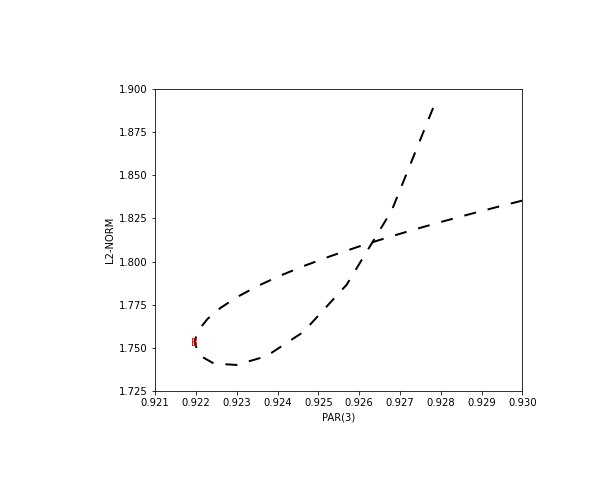

Created plot


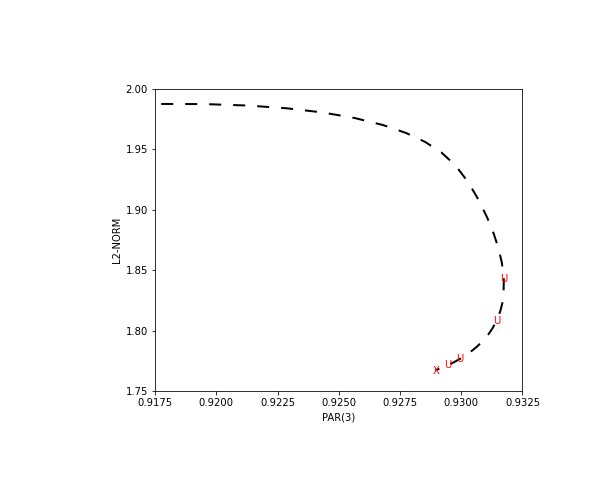

Created plot


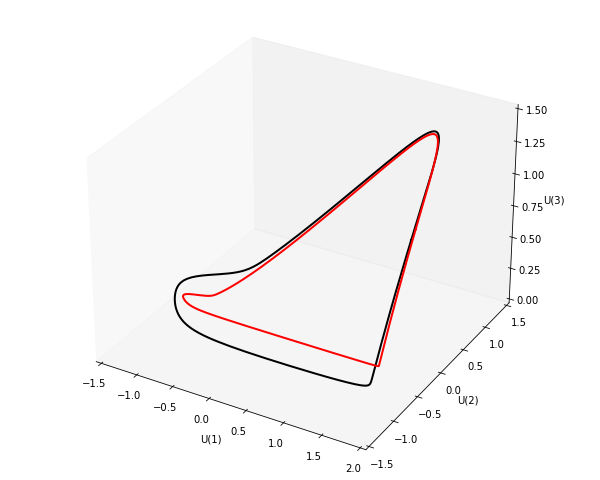

In [9]:
# plot bifurcation diagrams using plot routine from AUTO

p = ac.plot('1')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

p = ac.plot('3')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

# plot some of the periodic solutions
p = ac.plot('3')
p.config(type='solution')
p.config(stability=True, grid=False)
p.config(solution_x='U(1)',solution_y='U(2)',solution_z='U(3)')
p.config(label=[20,22])
p.savefig('b.png')
display(Image.open('b.png'))


In [10]:
# clean up files

ac.delete('1')
ac.delete('2')
ac.delete('3')
ac.clean()

Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting b.3 ... done
Deleting s.3 ... done
Deleting d.3 ... done
Deleting fort.* *.o *.exe *.*~ ... done
